In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

values = np.array(list(np.random.rand(10000)))

### talib直接使用

[0.23588946 0.21233046 0.72248972 ... 0.54933793 0.69819036 0.99428637]


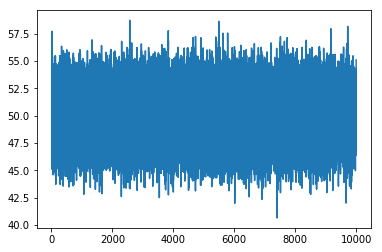

In [4]:
import talib
import matplotlib.pyplot as plt

print(values)
plt.plot(talib.RSI(values))

### talib使用abstract（用dataframe）

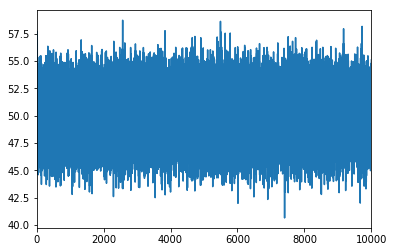

In [5]:
import talib.abstract as abstract


df = pd.DataFrame({
    'open': values,
    'high': values,
    'low': values,
    'close': values,
})

abstract.RSI(df).plot()

### 建立股價資料

In [1]:
from finlab2.data import Data
import pandas as pd

data = Data()

close = data.get('收盤價', 100000)
open_ = data.get('開盤價', 100000)
high  = data.get('最高價', 100000)
low   = data.get('最低價', 100000)
volume = data.get('成交股數', 100000)

def ohlc_df(sid):
    
    return pd.DataFrame({
        'close':close[sid],
        'open':open_[sid],
        'high':high[sid],
        'low':low[sid],
        'volume':volume[sid]/1000,
    })

### 計算所有指標

In [18]:
indicators = {}
df = ohlc_df('0050 元大台灣50')
for fname in dir(abstract):
    if fname[:2] == '__':
        continue
        
    if fname[:3] == 'CDL':
        continue
        
    if fname.upper() != fname:
        continue
    
    print(fname)
    try:
        f = getattr(abstract, fname)
        indicators[fname] = f(df)
    except:
        print('fail')
        pass

ACOS
AD
ADD
ADOSC
ADX
ADXR
APO
AROON
AROONOSC
ASIN
ATAN
ATR
AVGPRICE
BBANDS
BETA
BOP
CCI
CEIL
CMO
CORREL
COS
COSH
DEMA
DIV
DX
EMA
EXP
FLOOR
HT_DCPERIOD
HT_DCPHASE
HT_PHASOR
HT_SINE
HT_TRENDLINE
HT_TRENDMODE
KAMA
LINEARREG
LINEARREG_ANGLE
LINEARREG_INTERCEPT
LINEARREG_SLOPE
LN
LOG10
MA
MACD
MACDEXT
MACDFIX
MAMA
MAVP
fail
MAX
MAXINDEX
MEDPRICE
MFI
MIDPOINT
MIDPRICE
MIN
MININDEX
MINMAX
MINMAXINDEX
MINUS_DI
MINUS_DM
MOM
MULT
NATR
OBV
PLUS_DI
PLUS_DM
PPO
ROC
ROCP
ROCR
ROCR100
RSI
SAR
SAREXT
SIN
SINH
SMA
SQRT
STDDEV
STOCH
STOCHF
STOCHRSI
SUB
SUM
T3
TAN
TANH
TA_FUNC_FLAGS
fail
TA_INPUT_FLAGS
fail
TA_OUTPUT_FLAGS
fail
TEMA
TRANGE
TRIMA
TRIX
TSF
TYPPRICE
ULTOSC
VAR
WCLPRICE
WILLR
WMA


### 繪製所有指標

ACOS


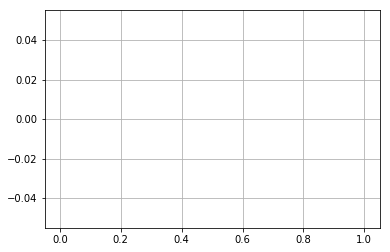

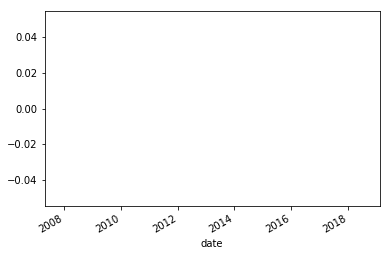

AD


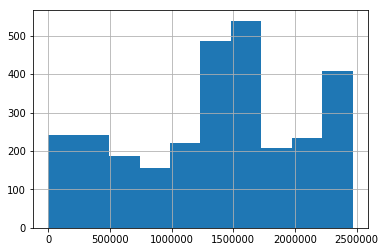

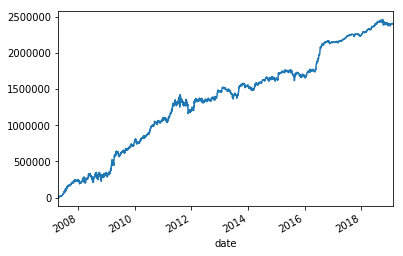

ADD


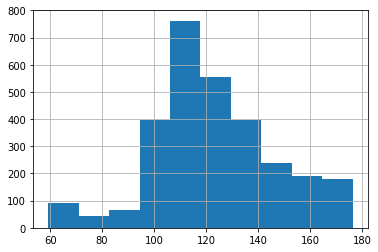

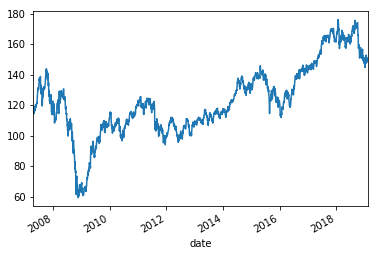

ADOSC


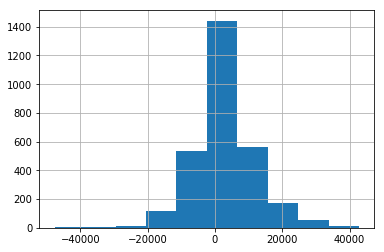

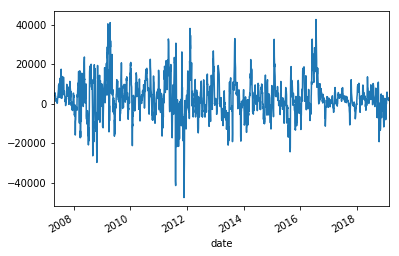

ADX


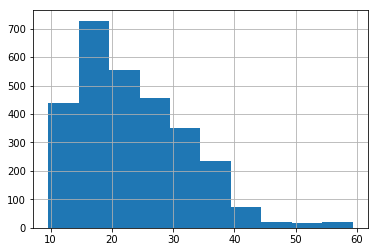

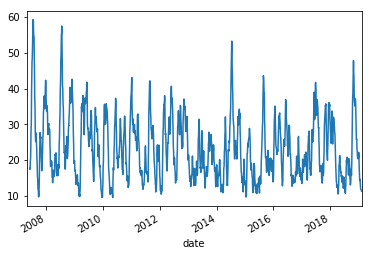

ADXR


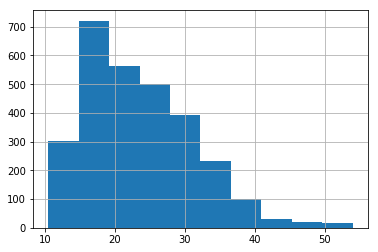

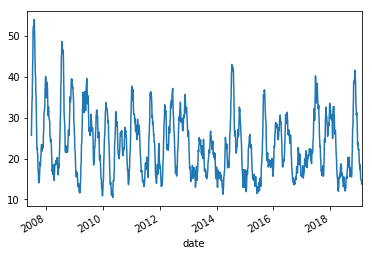

APO


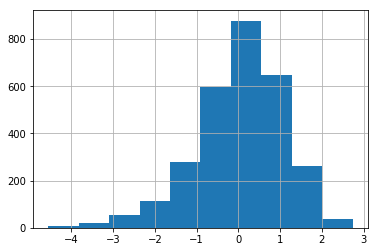

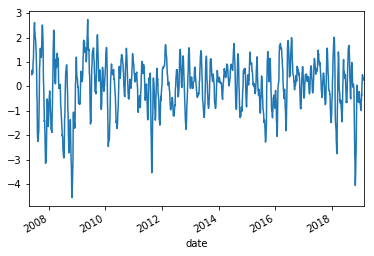

AROON


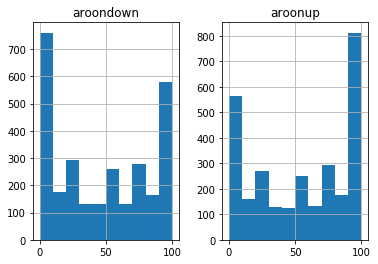

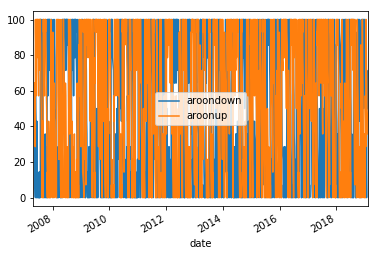

AROONOSC


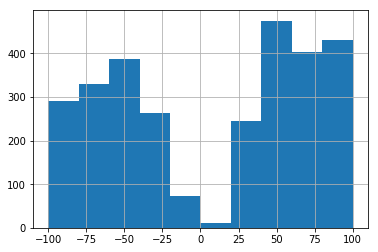

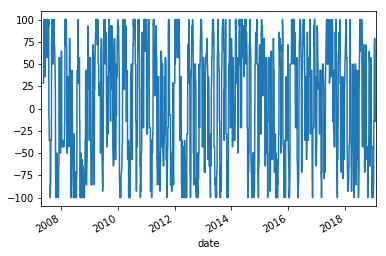

ASIN


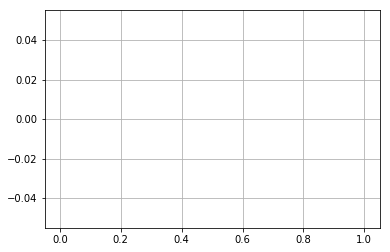

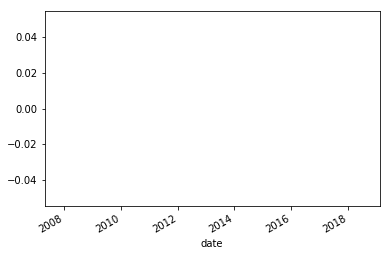

ATAN


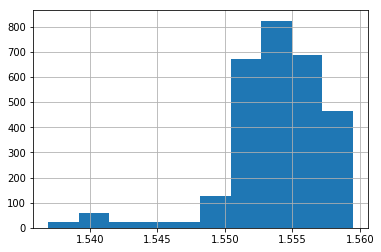

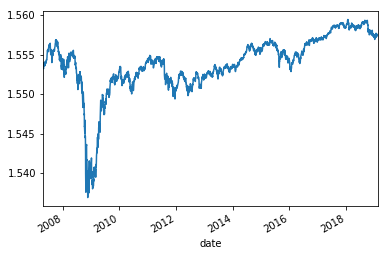

ATR


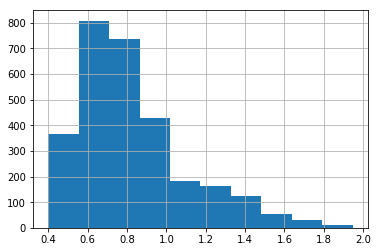

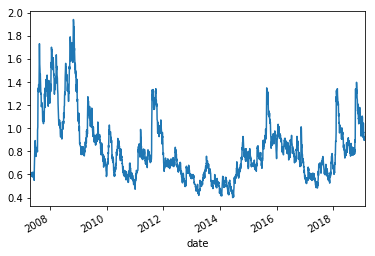

AVGPRICE


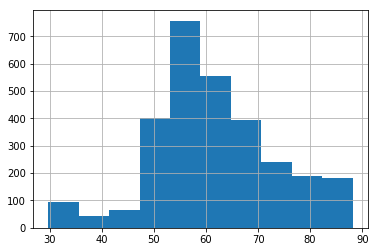

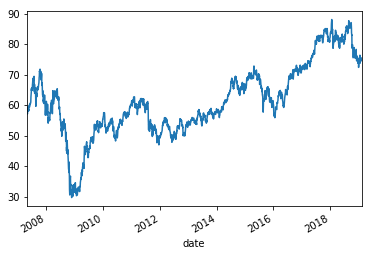

BBANDS


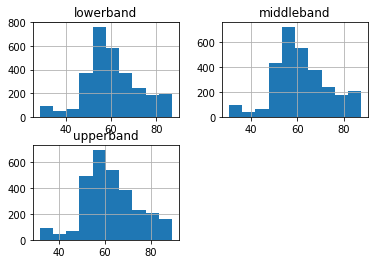

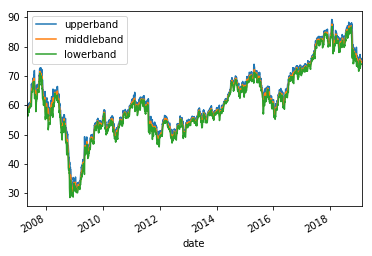

BETA


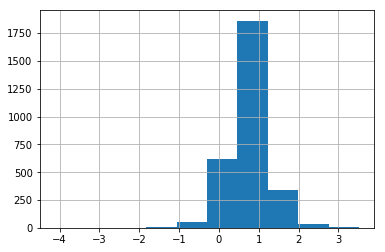

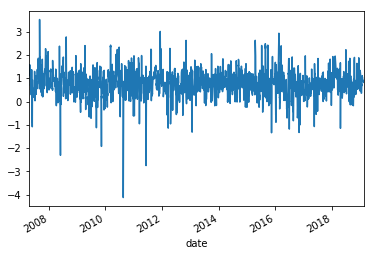

BOP


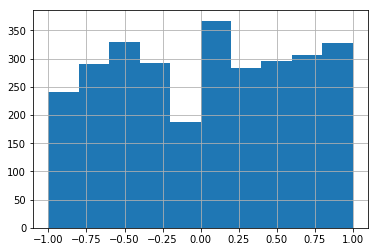

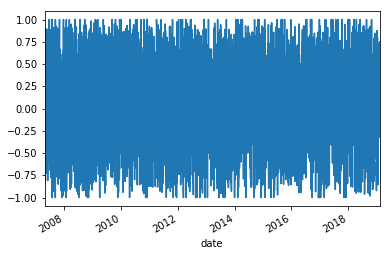

CCI


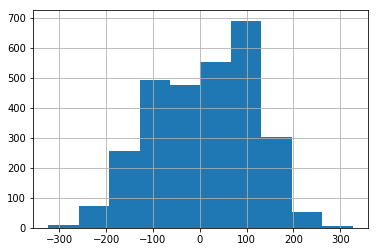

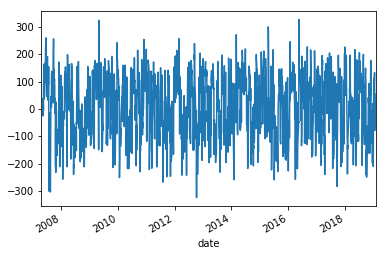

CEIL


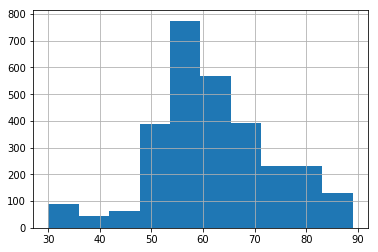

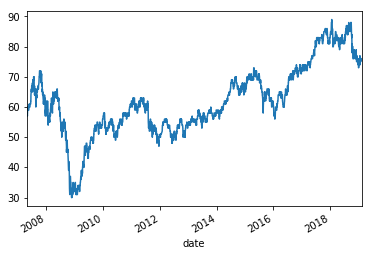

CMO


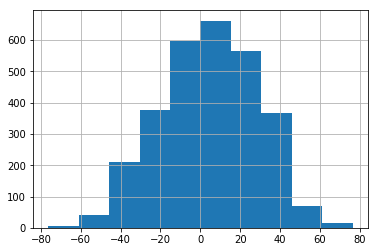

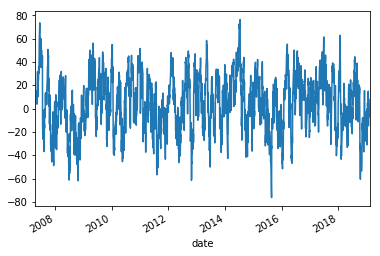

CORREL


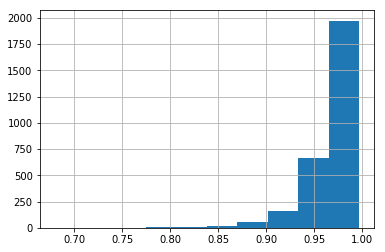

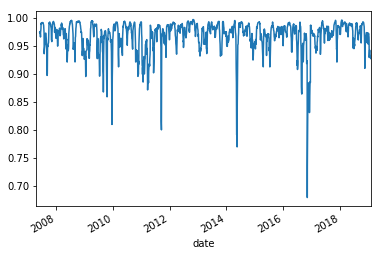

COS


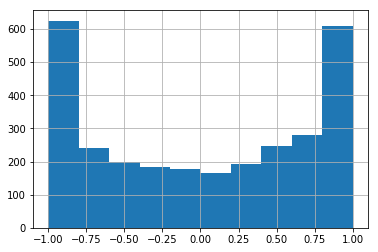

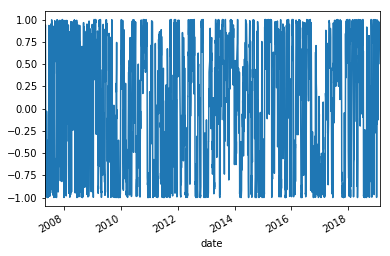

COSH


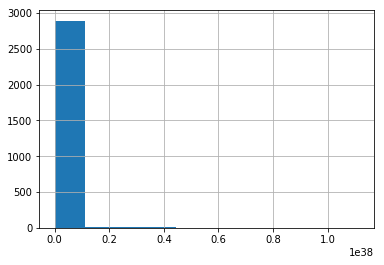

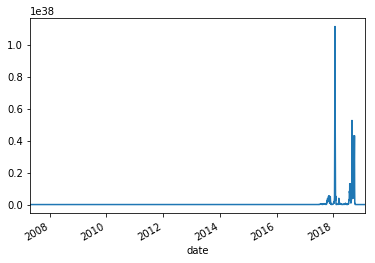

DEMA


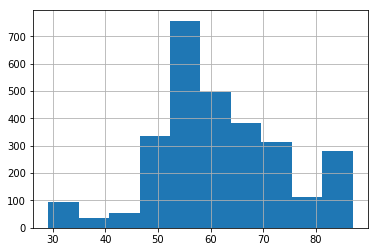

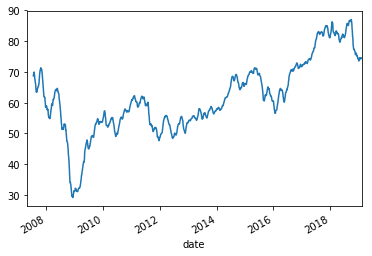

DIV


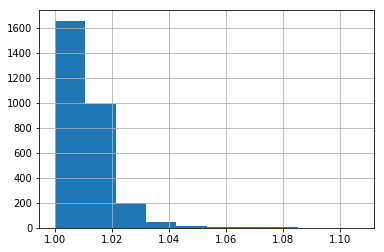

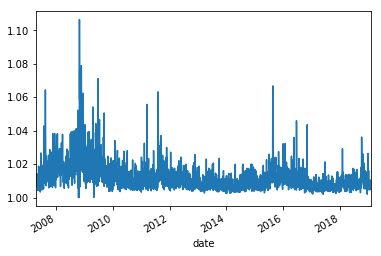

DX


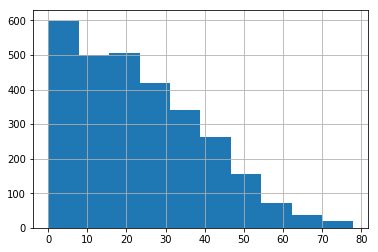

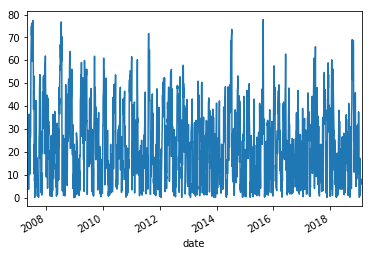

EMA


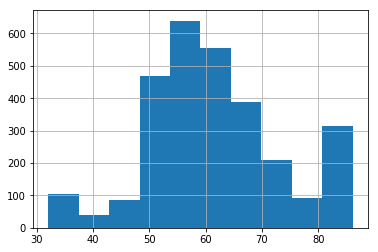

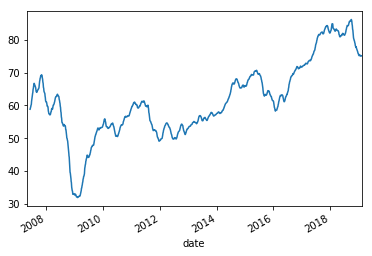

EXP


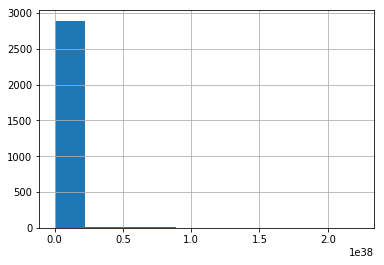

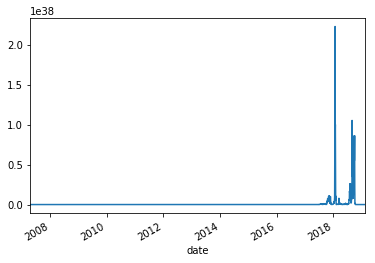

FLOOR


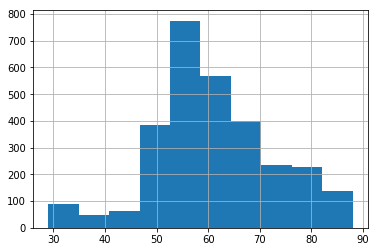

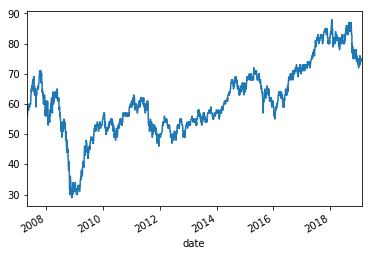

HT_DCPERIOD


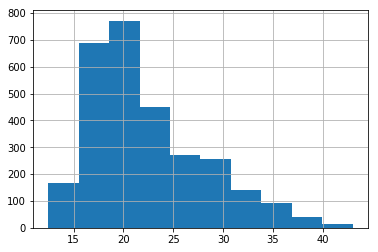

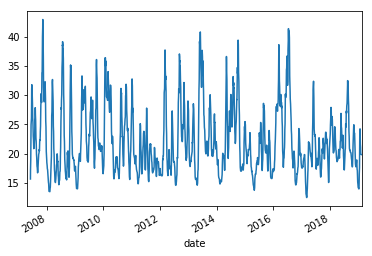

HT_DCPHASE


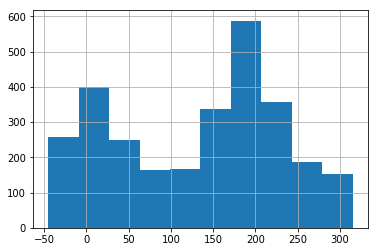

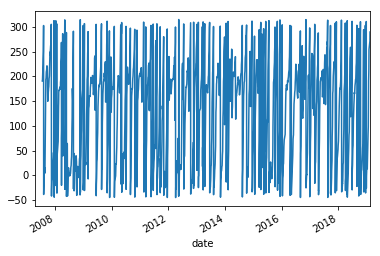

HT_PHASOR


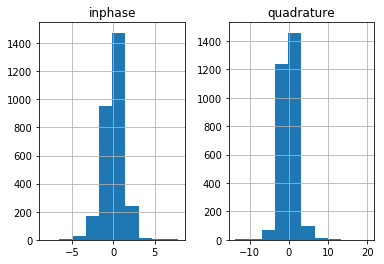

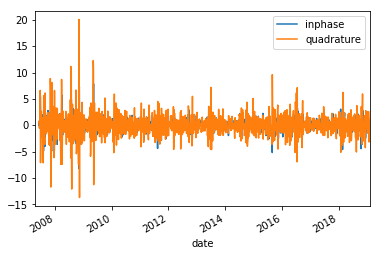

HT_SINE


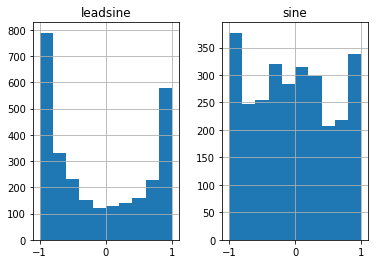

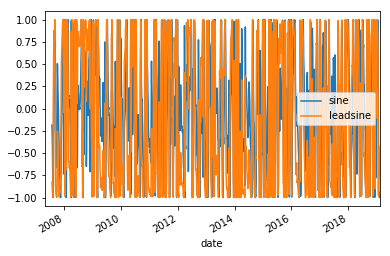

HT_TRENDLINE


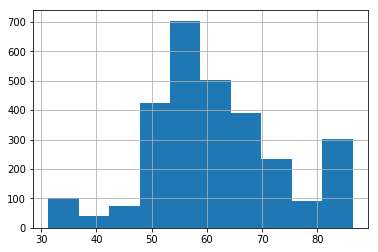

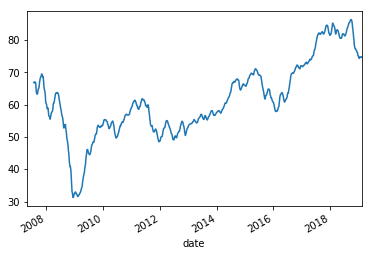

HT_TRENDMODE


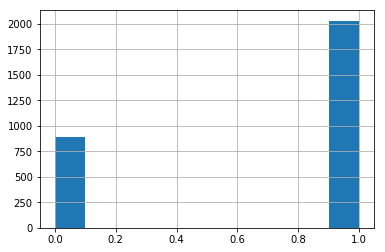

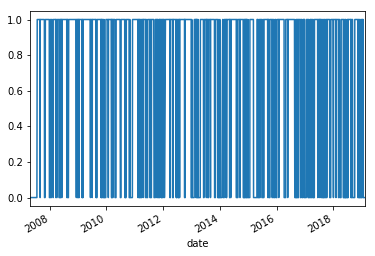

KAMA


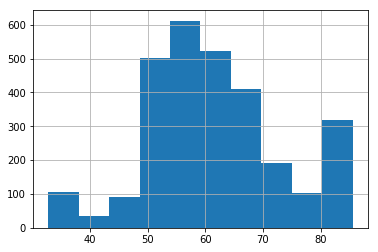

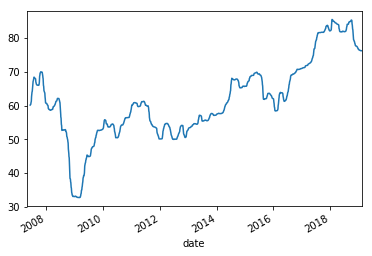

LINEARREG


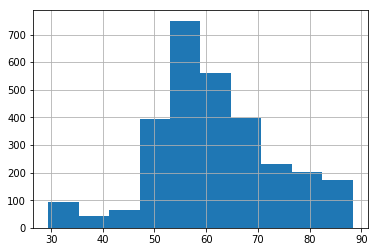

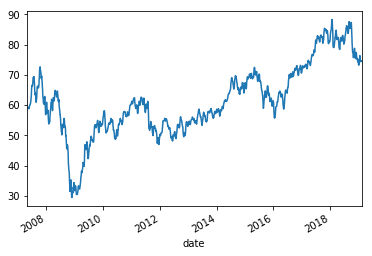

LINEARREG_ANGLE


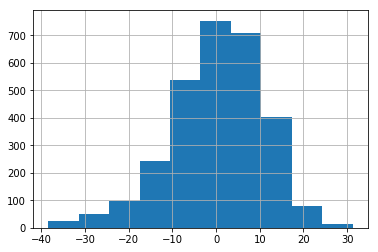

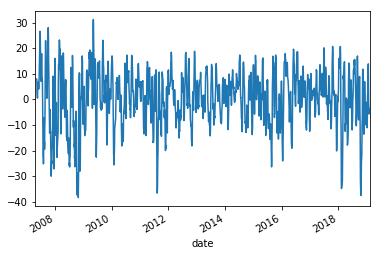

LINEARREG_INTERCEPT


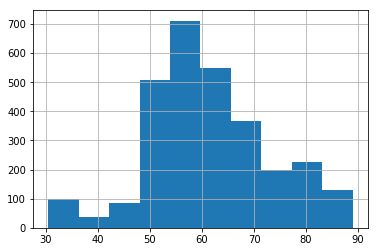

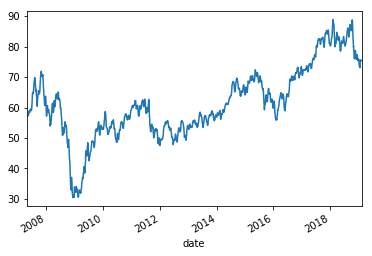

LINEARREG_SLOPE


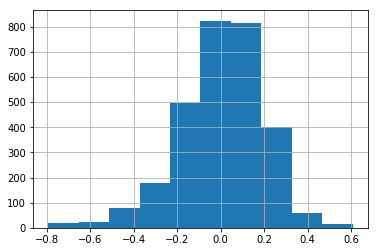

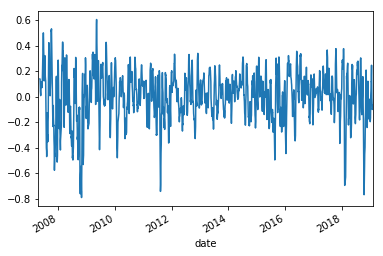

LN


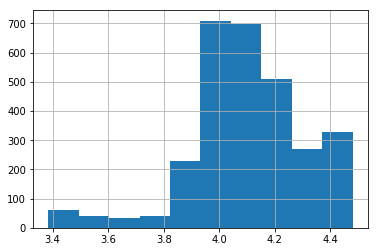

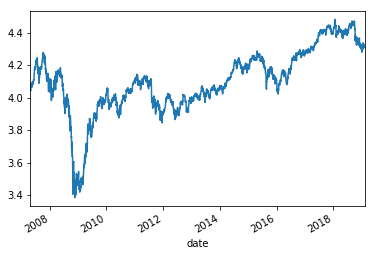

LOG10


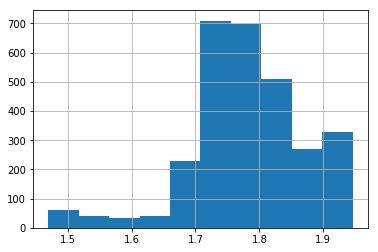

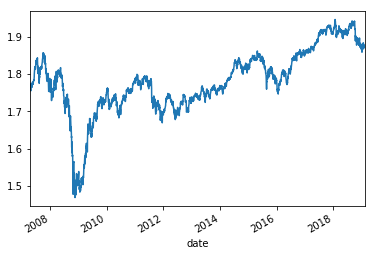

MA


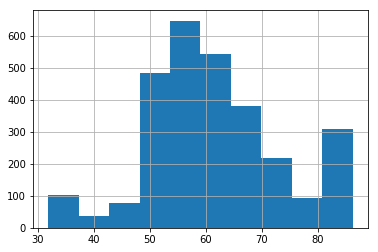

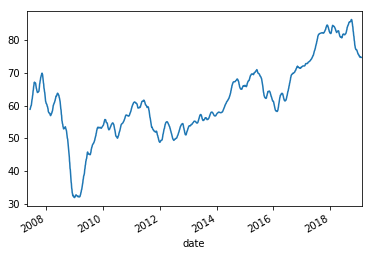

MACD


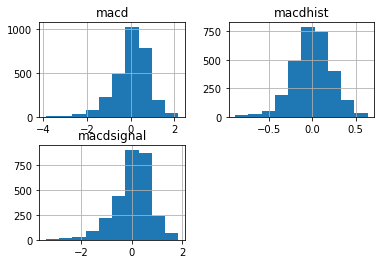

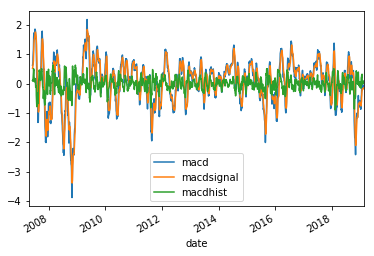

MACDEXT


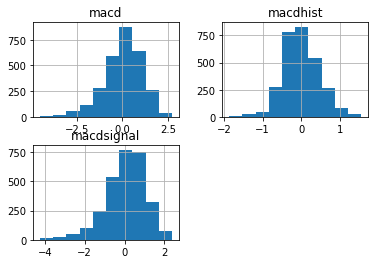

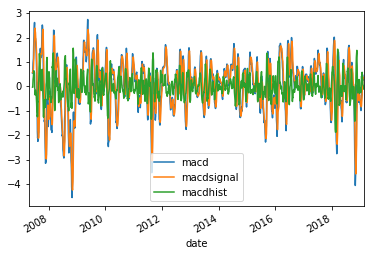

MACDFIX


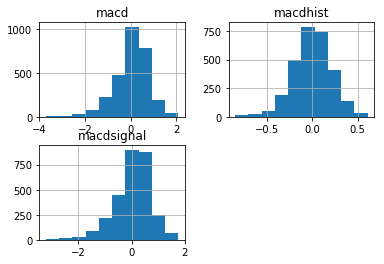

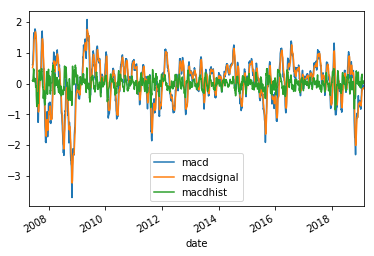

MAMA


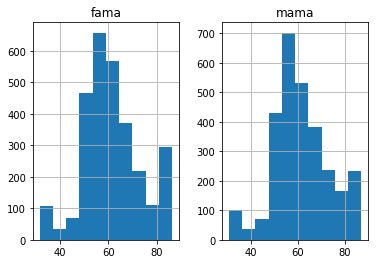

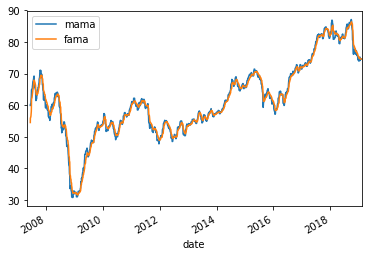

MAX


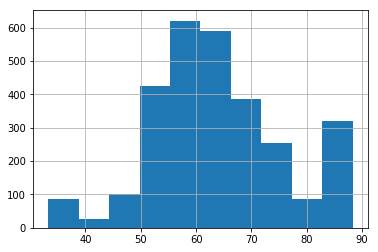

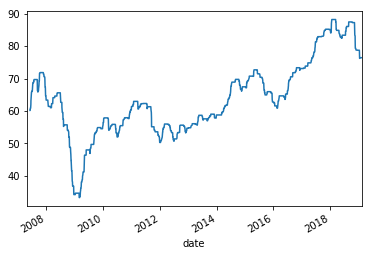

MAXINDEX


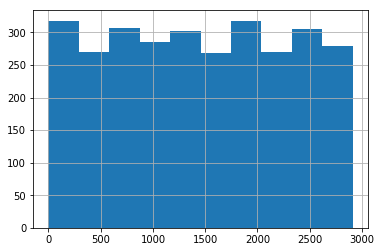

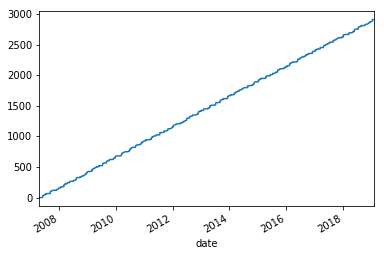

MEDPRICE


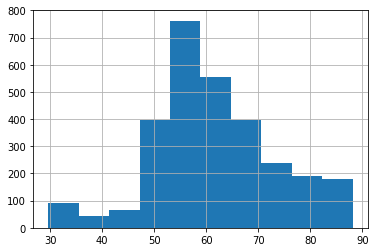

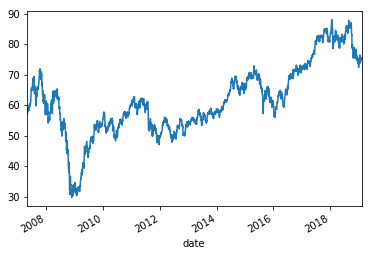

MFI


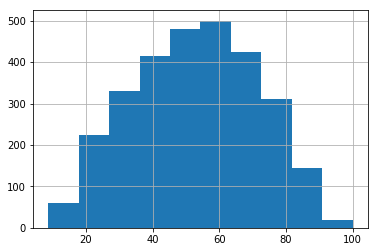

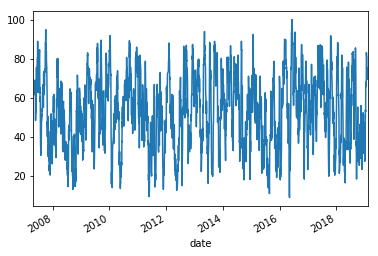

MIDPOINT


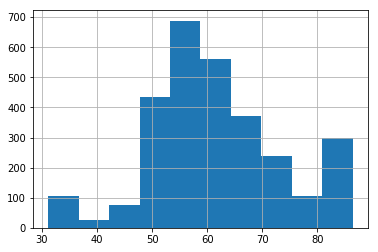

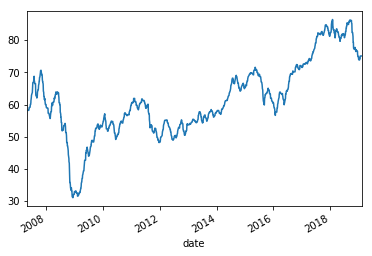

MIDPRICE


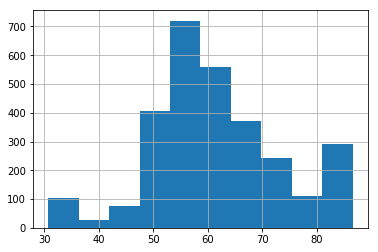

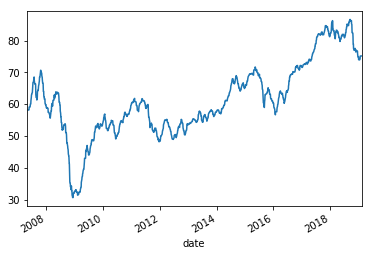

MIN


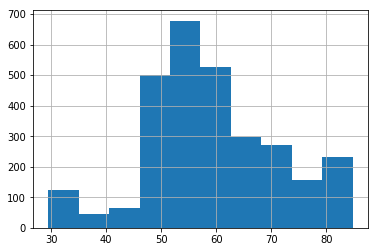

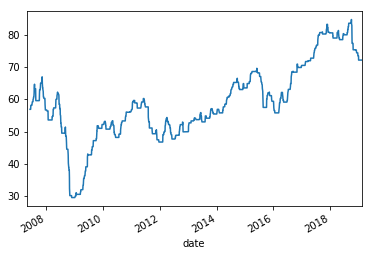

MININDEX


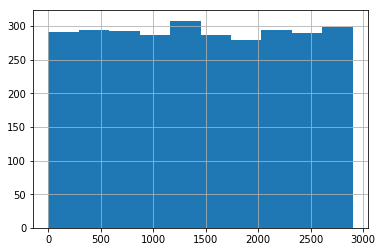

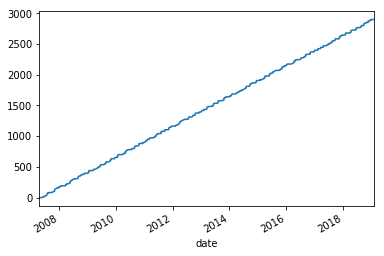

MINMAX


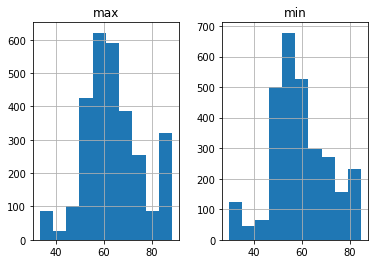

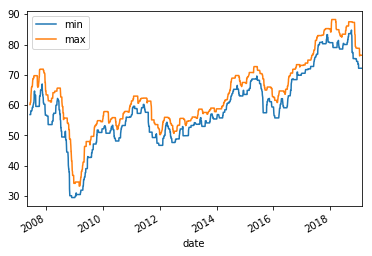

MINMAXINDEX


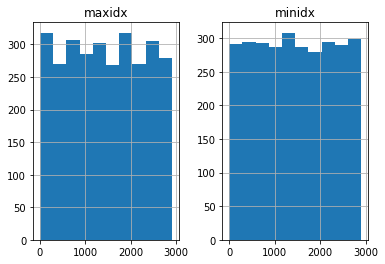

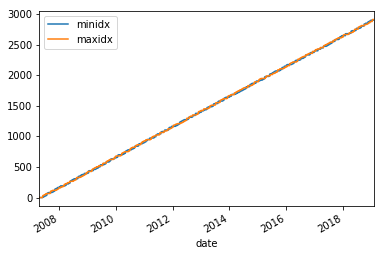

MINUS_DI


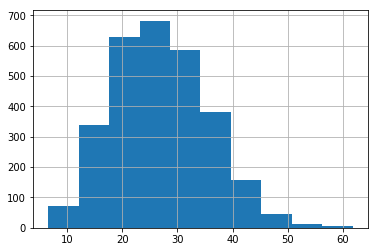

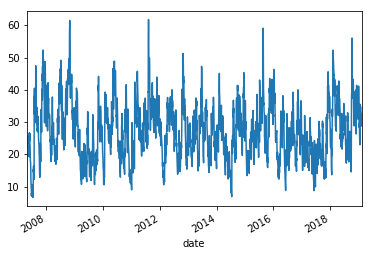

MINUS_DM


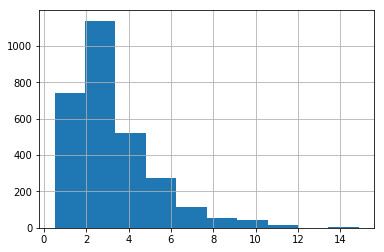

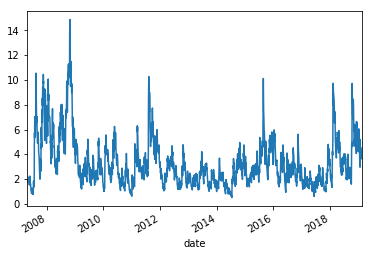

MOM


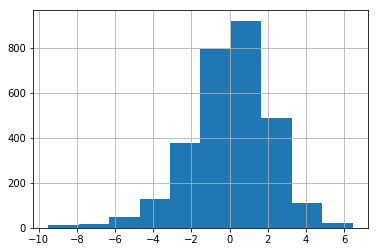

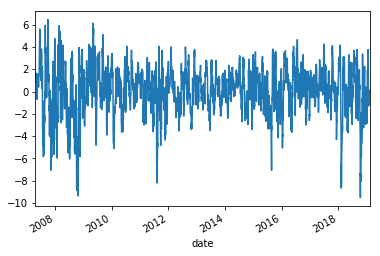

MULT


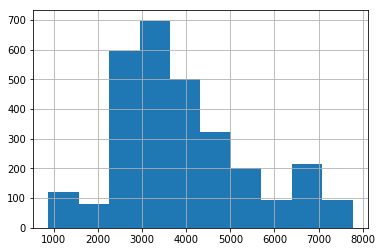

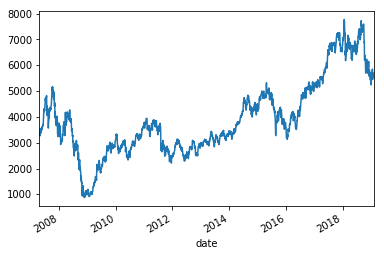

NATR


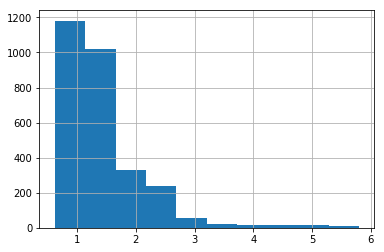

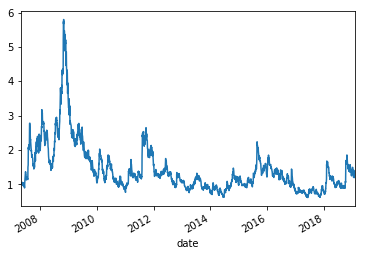

OBV


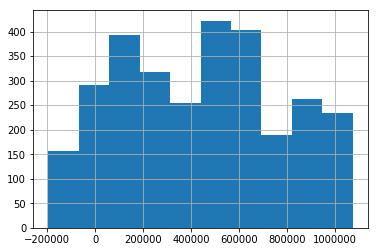

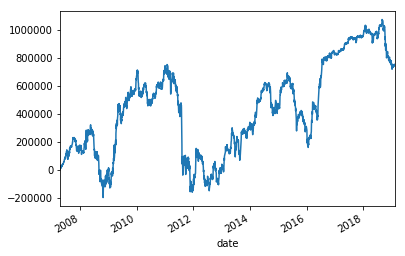

PLUS_DI


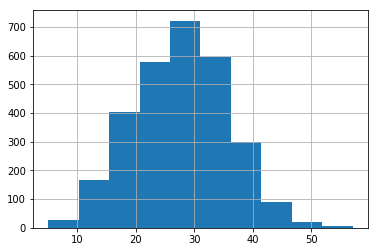

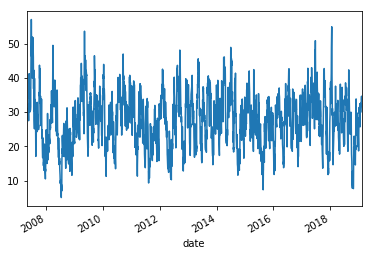

PLUS_DM


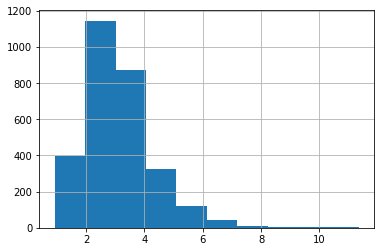

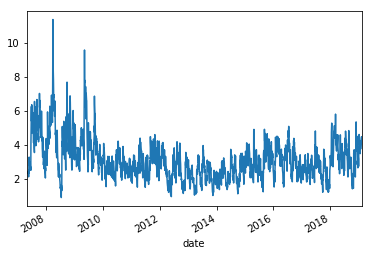

PPO


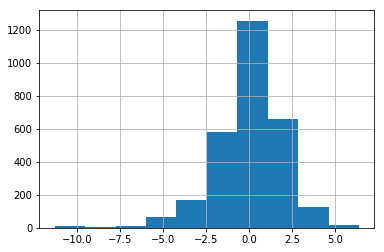

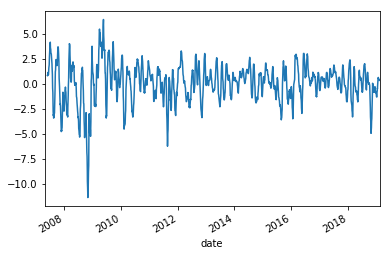

ROC


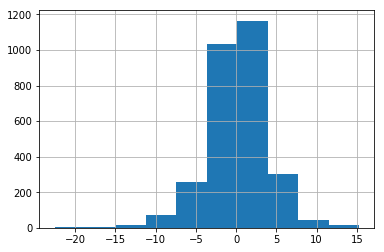

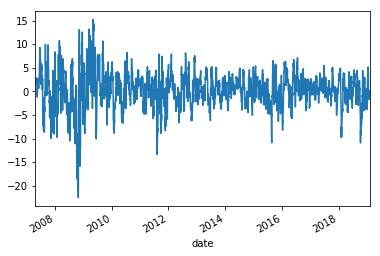

ROCP


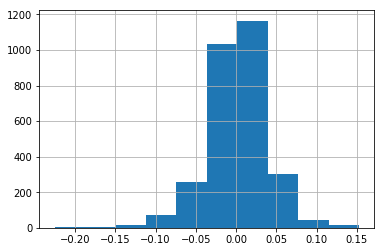

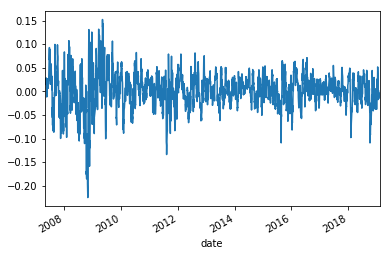

ROCR


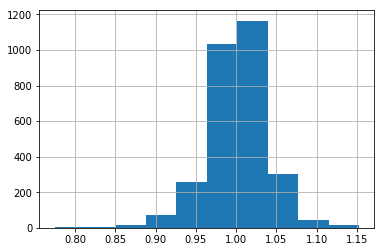

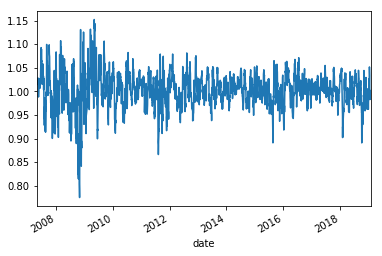

ROCR100


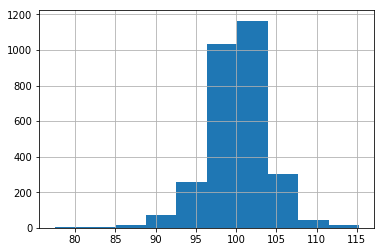

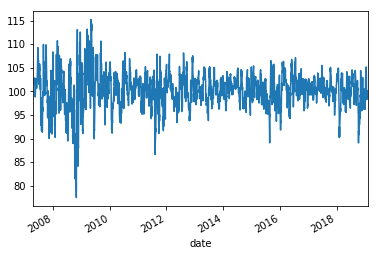

RSI


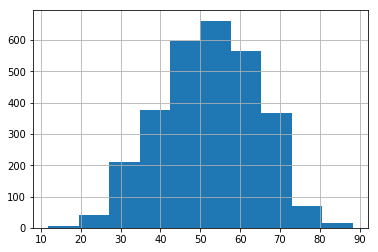

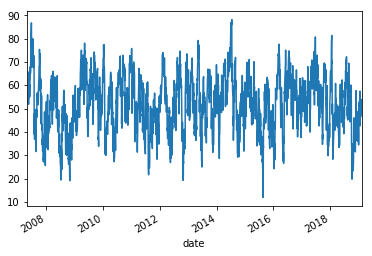

SAR


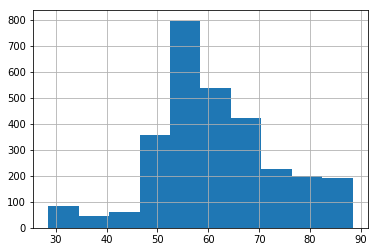

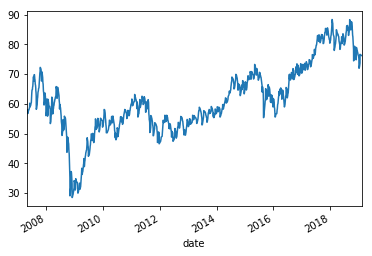

SAREXT


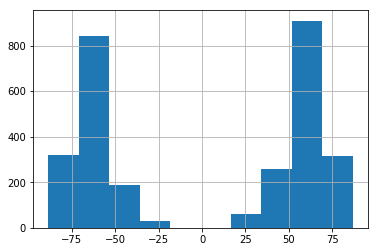

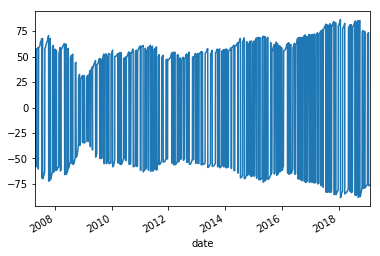

SIN


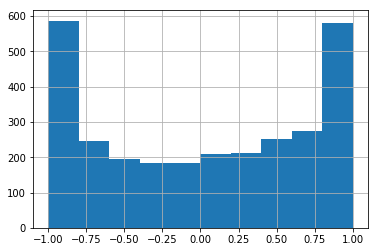

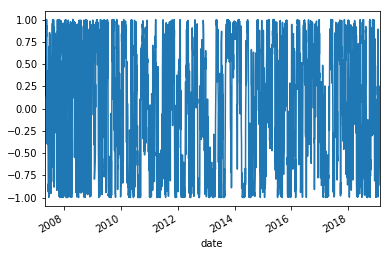

SINH


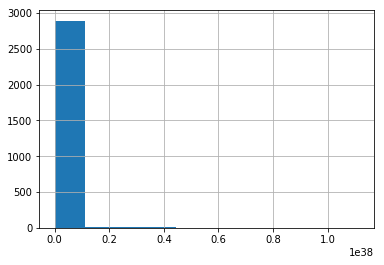

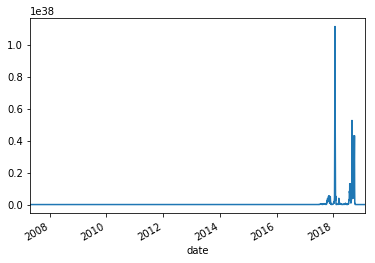

SMA


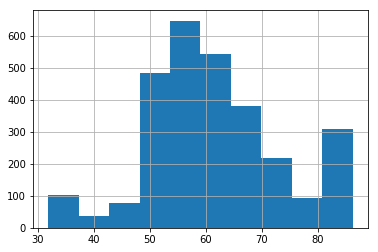

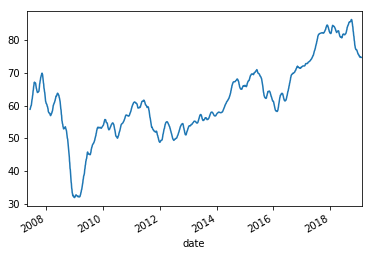

SQRT


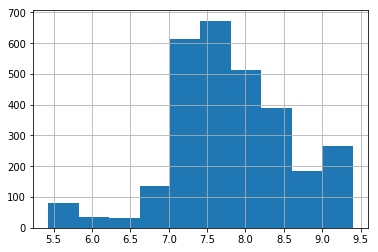

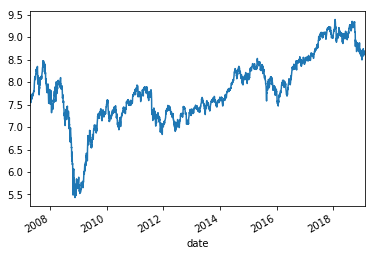

STDDEV


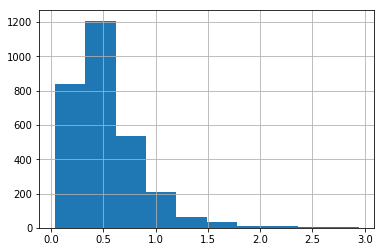

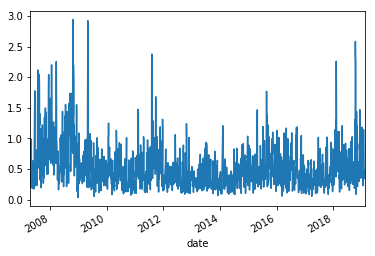

STOCH


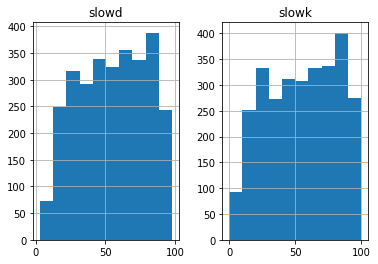

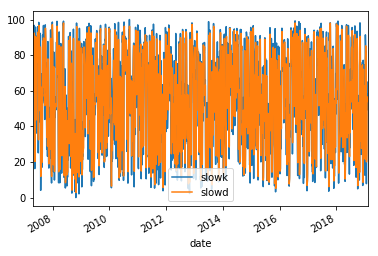

STOCHF


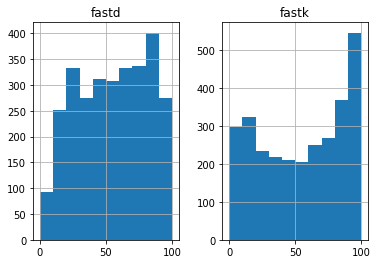

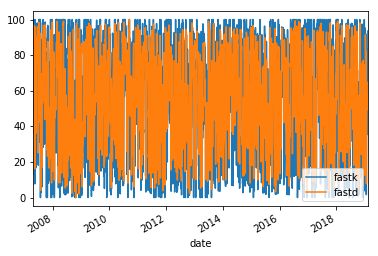

STOCHRSI


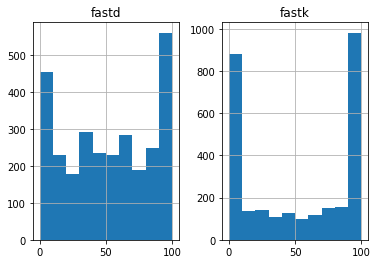

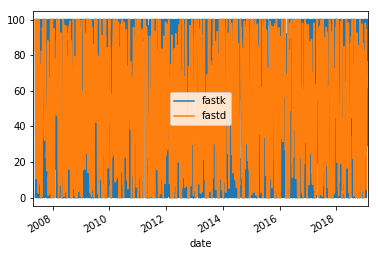

SUB


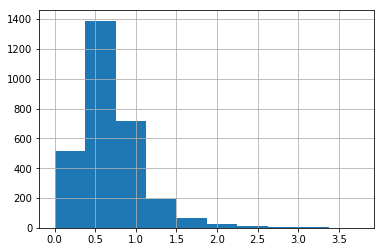

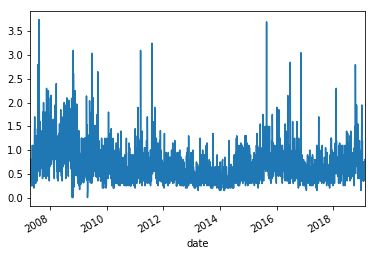

SUM


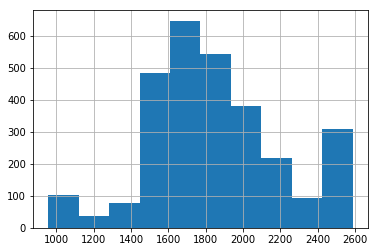

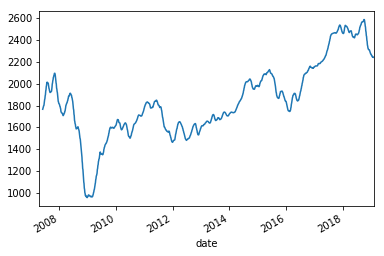

T3


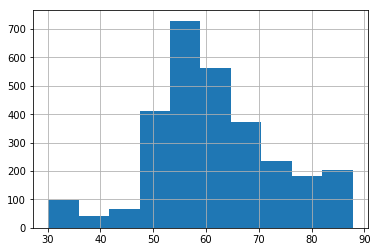

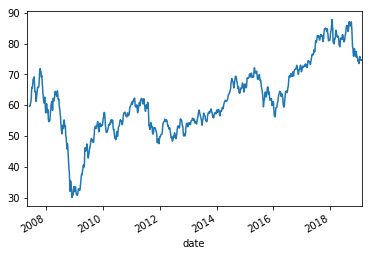

TAN


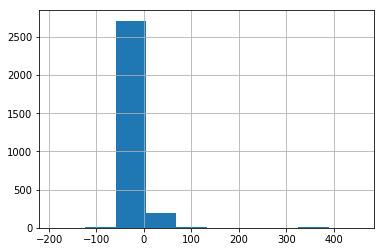

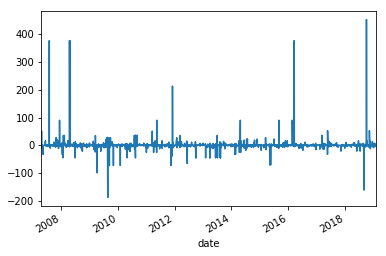

TANH


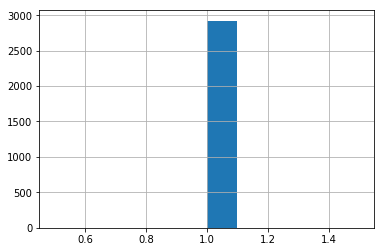

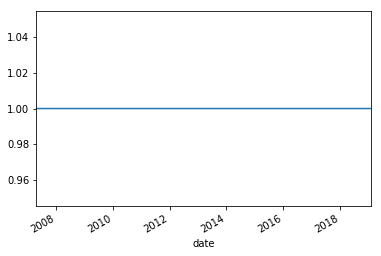

TEMA


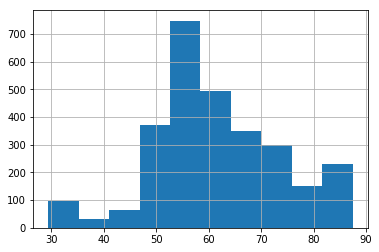

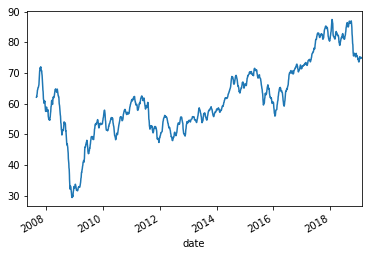

TRANGE


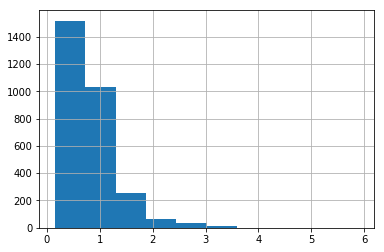

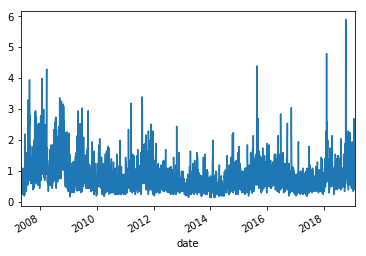

TRIMA


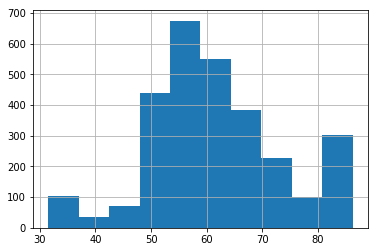

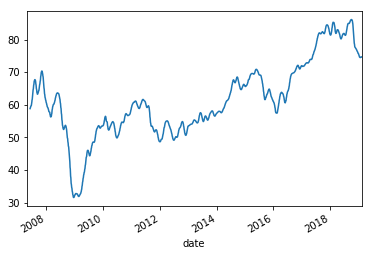

TRIX


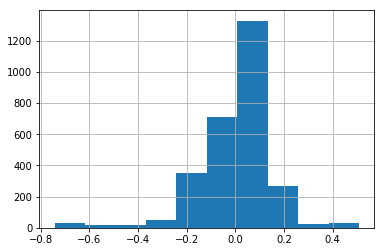

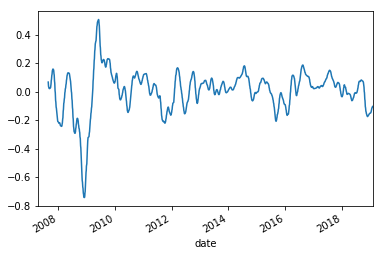

TSF


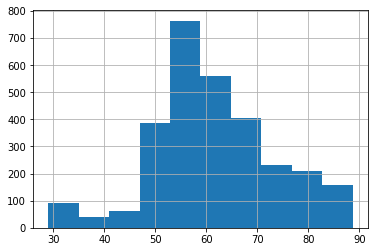

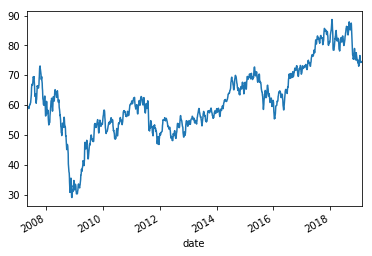

TYPPRICE


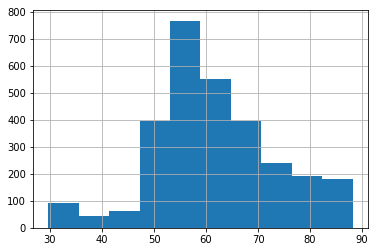

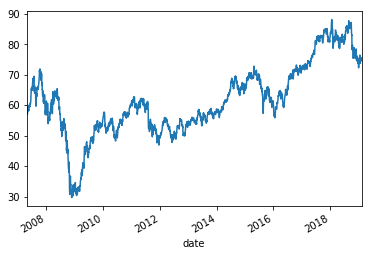

ULTOSC


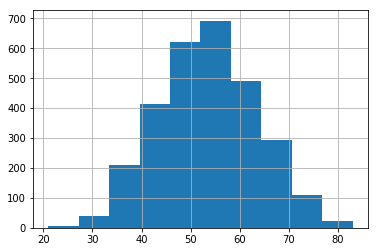

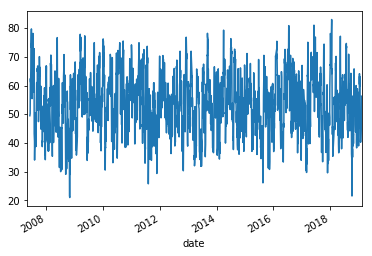

VAR


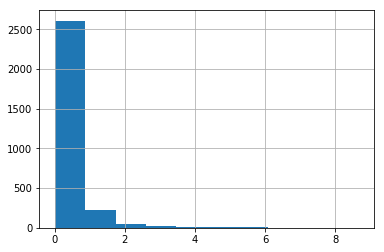

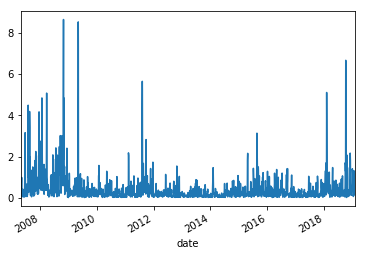

WCLPRICE


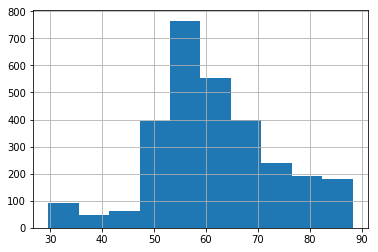

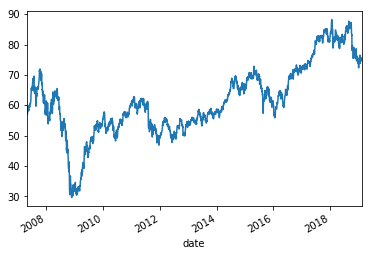

WILLR


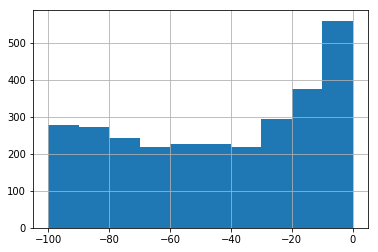

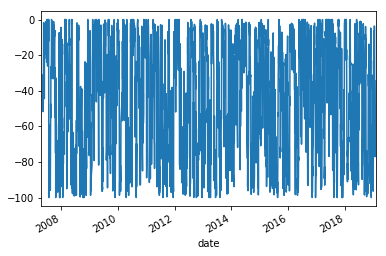

WMA


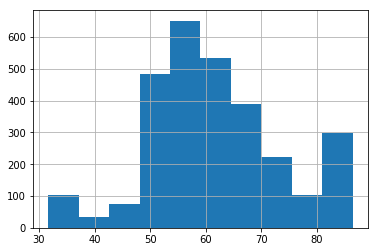

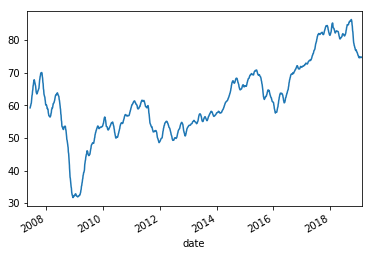

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
for name, df in indicators.items():
    print(name)
    df.hist()
    plt.show()
    df.plot()
    plt.show()

### 察看指標的屬性

In [10]:
print('------- parameters -------')
print(abstract.STOCH.parameters)

print('------- output_names ------')
print(abstract.STOCH.output_names)

------- parameters -------
OrderedDict([('fastk_period', 5), ('slowk_period', 3), ('slowk_matype', 0), ('slowd_period', 3), ('slowd_matype', 0)])
------- output_names ------
['slowk', 'slowd']


### keyword arguments 教學

In [16]:
# functional argument

def func(a, b):
    return a + b

parms = {}
parms['a'] = 1
parms['b'] = 2

func(**d) # func(a=1, b=2)

3

### 參數調整

In [27]:
params = dict(abstract.STOCH.parameters)

print('original parameters')
print(params)

params2 = {}
for name, value in params.items():
    params2[name] = value * 2

print('modified parameters')
print(params2)

original parameters
{'fastk_period': 5, 'slowk_period': 3, 'slowk_matype': 0, 'slowd_period': 3, 'slowd_matype': 0}
modified parameters
{'fastk_period': 10, 'slowk_period': 6, 'slowk_matype': 0, 'slowd_period': 6, 'slowd_matype': 0}


### 製作features

In [49]:
from finlab2 import ml

df = ohlc_df('0050 元大台灣50')
indicators = ['STOCH', 'RSI', 'ADOSC']
multipliers = list(range(1, 10))

print(df.head())
print(indicators)
print(multipliers)

def kddiff(values):
    values['diff'] = values.slowk - values.slowd
    return values[['diff']]

preprocessing = {
    'STOCH':kddiff
}

features = ml.talib_features(df, indicators, multipliers)
features

            close   open   high    low   volume
date                                           
2007-04-23  57.85  57.55  58.10  57.50  8571.00
2007-04-24  58.10  57.90  58.10  57.60  2483.01
2007-04-25  57.60  57.80  57.85  57.45  1232.00
2007-04-26  57.70  57.95  58.00  57.55  6357.00
2007-04-27  57.50  57.70  57.80  57.20  1070.00
['STOCH', 'RSI', 'ADOSC']
[1, 2, 3, 4, 5, 6, 7, 8, 9]


,"STOCH_slowk_{'fastk_period': 5, 'slowk_period': 3, 'slowk_matype': 0, 'slowd_period': 3, 'slowd_matype': 0}","STOCH_slowd_{'fastk_period': 5, 'slowk_period': 3, 'slowk_matype': 0, 'slowd_period': 3, 'slowd_matype': 0}","STOCH_slowk_{'fastk_period': 10, 'slowk_period': 6, 'slowk_matype': 0, 'slowd_period': 6, 'slowd_matype': 0}","STOCH_slowd_{'fastk_period': 10, 'slowk_period': 6, 'slowk_matype': 0, 'slowd_period': 6, 'slowd_matype': 0}","STOCH_slowk_{'fastk_period': 15, 'slowk_period': 9, 'slowk_matype': 0, 'slowd_period': 9, 'slowd_matype': 0}","STOCH_slowd_{'fastk_period': 15, 'slowk_period': 9, 'slowk_matype': 0, 'slowd_period': 9, 'slowd_matype': 0}","STOCH_slowk_{'fastk_period': 20, 'slowk_period': 12, 'slowk_matype': 0, 'slowd_period': 12, 'slowd_matype': 0}","STOCH_slowd_{'fastk_period': 20, 'slowk_period': 12, 'slowk_matype': 0, 'slowd_period': 12, 'slowd_matype': 0}","STOCH_slowk_{'fastk_period': 25, 'slowk_period': 15, 'slowk_matype': 0, 'slowd_period': 15, 'slowd_matype': 0}","STOCH_slowd_{'fastk_period': 25, 'slowk_period': 15, 'slowk_matype': 0, 'slowd_period': 15, 'slowd_matype': 0}",...,RSI_{'timeperiod': 126},"ADOSC_{'fastperiod': 3, 'slowperiod': 10}","ADOSC_{'fastperiod': 6, 'slowperiod': 20}","ADOSC_{'fastperiod': 9, 'slowperiod': 30}","ADOSC_{'fastperiod': 12, 'slowperiod': 40}","ADOSC_{'fastperiod': 15, 'slowperiod': 50}","ADOSC_{'fastperiod': 18, 'slowperiod': 60}","ADOSC_{'fastperiod': 21, 'slowperiod': 70}","ADOSC_{'fastperiod': 24, 'slowperiod': 80}","ADOSC_{'fastperiod': 27, 'slowperiod': 90}"
date,,,,,,,,,,,,,,,,,,,,,
2007-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-04,85.849462,59.405814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
